# RSJ model: CPR of $I(\phi)=[\sin(\phi)+\eta\sin(2\phi)]+A(\sin(\phi+C)+\eta\sin[2(\phi+C)])$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from scipy.integrate import odeint
from scipy.optimize import fmin
from scipy.io import savemat,loadmat
import h5py

In [2]:
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage[utf8]{inputenc}',
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [3]:
%matplotlib inline

In [4]:
h=6.62607004e-34
hbar=h/2/np.pi
Qe=1.602176634e-19
Ic=2e-6
Rn=13

### Load experimental data

In [5]:
exp_data=loadmat("../dense_sweeps_27mK_0mT.mat")
Sweep_np=exp_data['dense27mK0mTnp']
print(Sweep_np.shape)
Sweep_pn=exp_data['dense27mK0mTpn']

(2001, 2)


## Skewed Gaussian fitting for the experimental data

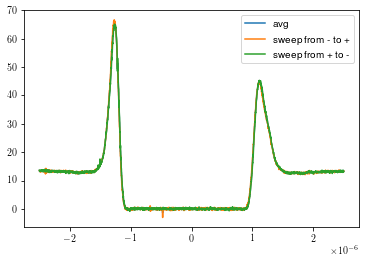

In [6]:
DVDI_exp_avg=(Sweep_np[:,1]+np.flip(Sweep_pn[:,1]))/2
plt.figure()
plt.plot(Sweep_np[:,0],DVDI_exp_avg,label="avg")
plt.plot(Sweep_np[:,0],Sweep_np[:,1],label='sweep from - to +')
plt.plot(Sweep_pn[:,0],Sweep_pn[:,1],label='sweep from + to -')
plt.legend()
plt.show()

### Fit the left peak $I_{DC}<0$

In [23]:
DVDI_left_exp=DVDI_exp_avg[350:650]
IDC_left=Sweep_np[350:650,0]

In [7]:
from scipy.special import erf

In [8]:
def _Skewed_Gaussian(x,amp,mean,sigma,gamma):
    return amp/np.sqrt(2*np.pi)/sigma*np.exp(-(x-mean)**2/2/sigma**2)*(1+erf(gamma*(x-mean)/sigma/np.sqrt(2)))

In [25]:
from scipy.optimize import curve_fit

In [29]:
popt_left,pcov_left = curve_fit(_Skewed_Gaussian, IDC_left[80:300], DVDI_left_exp[80:300],p0=[1,-1.27e-6,2e-7,1])
print(popt_left)
perr_left = np.sqrt(np.diag(pcov_left))
print(perr_left)

[ 1.35198067e-05 -1.19621046e-06  1.38093536e-07 -3.04709560e+00]
[3.71524950e-08 3.71351087e-10 7.90858593e-10 4.65055849e-02]


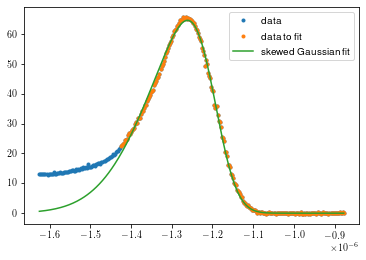

In [30]:
plt.figure()
plt.plot(IDC_left,DVDI_left_exp,'.',label="data")
plt.plot(IDC_left[80:300],DVDI_left_exp[80:300],'.',label="data to fit")

plt.plot(IDC_left,_Skewed_Gaussian(IDC_left,*popt_left),label='skewed Gaussian fit')
plt.legend()
plt.show()


### Fit the right peak $I_{DC}>0$

In [31]:
IDC_right=Sweep_np[1300:1600,0]
DVDI_right_exp=DVDI_exp_avg[1300:1600]

In [32]:
popt_right,pcov_right = curve_fit(_Skewed_Gaussian, IDC_right[:230], DVDI_right_exp[:230],p0=[13,1.27e-6,2e-7,1])
print(popt_right)
perr_right = np.sqrt(np.diag(pcov_right))
print(perr_right)

[1.42989650e-05 1.02240148e-06 2.31549737e-07 4.53895282e+00]
[4.38055416e-08 3.47495434e-10 1.23998016e-09 5.80121960e-02]


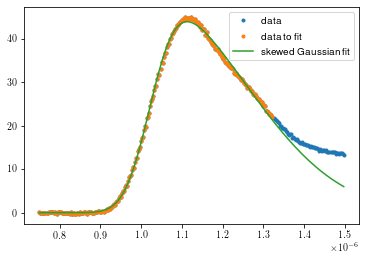

In [33]:
plt.figure()
plt.plot(IDC_right,DVDI_right_exp,'.',label="data")
plt.plot(IDC_right[:230],DVDI_right_exp[:230],'.',label="data to fit")

plt.plot(IDC_right,_Skewed_Gaussian(IDC_right,*popt_right),label='skewed Gaussian fit')
plt.legend()
plt.show()


### Fit both peaks together with skewed Gaussians

In [7]:
IDC_exp=Sweep_np[:,0]

In [11]:
from scipy.special import erf
from scipy.optimize import curve_fit

In [9]:
def _2Skewed_Gaussians(x,amp1,mean1,sigma1,gamma1,amp2,mean2,sigma2,gamma2):
    return amp1/np.sqrt(2*np.pi)/sigma1*np.exp(-(x-mean1)**2/2/sigma1**2)*(1+erf(gamma1*(x-mean1)/sigma1/np.sqrt(2)))+\
           amp2/np.sqrt(2*np.pi)/sigma2*np.exp(-(x-mean2)**2/2/sigma2**2)*(1+erf(gamma2*(x-mean2)/sigma2/np.sqrt(2)))

In [12]:
popt_two,pcov_two = curve_fit(_2Skewed_Gaussians, IDC_exp[450:1550], DVDI_exp_avg[450:1550],p0=[1,-1.27e-6,2e-7,1,1,1.12e-6,2e-7,1])
print(popt_two)
perr_two = np.sqrt(np.diag(pcov_two))
print(perr_two)

[ 1.30583122e-05 -1.19932412e-06  1.27745179e-07 -2.64115663e+00
  1.44871695e-05  1.02162591e-06  2.36788292e-07  4.70825822e+00]
[2.44550491e-08 2.35957149e-10 5.54378983e-10 2.56139864e-02
 2.38126605e-08 2.23081113e-10 6.74284964e-10 3.71314877e-02]


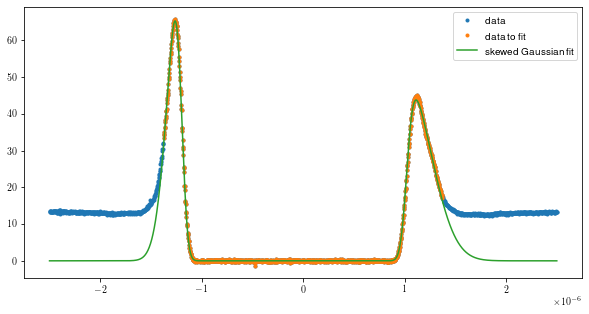

In [38]:
plt.figure(figsize=(10,5))
plt.plot(IDC_exp,DVDI_exp_avg,'.',label="data")
plt.plot(IDC_exp[450:1550],DVDI_exp_avg[450:1550],'.',label="data to fit")

plt.plot(IDC_exp,_2Skewed_Gaussians(IDC_exp,*popt_two),label='skewed Gaussian fit')
plt.legend()
plt.show()


### CSV for Jimmy

In [14]:
np.savetxt("IDC_exp.csv", IDC_exp, delimiter=",")
np.savetxt("DVDI_exp_avg.csv",DVDI_exp_avg,delimiter=",")
np.savetxt("skewed_Gaussion_fit.csv",_2Skewed_Gaussians(IDC_exp,*popt_two),delimiter=",")

### Trying to do the convolution

In [258]:
from scipy.signal import convolve

In [326]:
convolved=convolve(DVDI[6,:,A_idx],_2Skewed_Gaussians(IDC_exp,*popt_two),mode='same',method='direct')

In [320]:
convolved.shape

(1600,)

In [261]:
(_Skewed_Gaussian(IDC_left,*popt_left)).shape

(300,)

In [262]:
DVDI[6,:,A_idx].shape

(1600,)

(-5e-06, 5e-06)

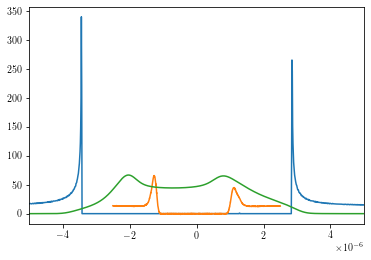

In [327]:
plt.figure()
plt.plot(IDC,DVDI[6,:,A_idx])
plt.plot(IDC_exp,DVDI_exp_avg)
plt.plot(IDC,convolved/4000)
plt.xlim([-0.5e-5,0.5e-5])
#plt.ylim([0,100])

### Trying to analyze the slope of the I-V curve, instead of peak heights

In [35]:
V.shape

(41, 1600, 121)

In [41]:
A_idx=97
print(eta[A_idx],A[A_idx])

0.9 0.8


In [62]:
V_n=V[:,:-800,:]
IDC_n=IDC[:-800]

In [63]:
V_p=V[:,800:,:]
IDC_p=IDC[800:]

In [73]:
C[20]/np.pi

0.0

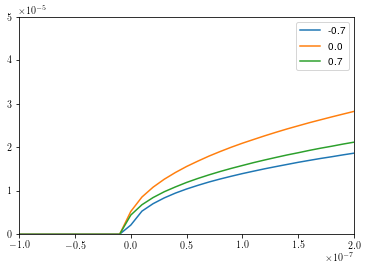

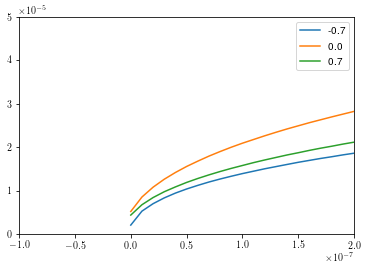

In [85]:
C_idx=[6,20,34]
plt.figure()
for i in C_idx:
    plt.plot(IDC-Icp[i,A_idx],V[i,:,A_idx],label=str(np.round(C[i]/np.pi,3)))
plt.xlim([-0.1e-6,0.2e-6])
plt.ylim([0,0.00005])
plt.legend(loc=0)
plt.show()
for i in C_idx:
    plt.plot(IDC[IDC>=Icp[i,A_idx]]-Icp[i,A_idx],V[i,IDC>=Icp[i,A_idx],A_idx],label=str(np.round(C[i]/np.pi,3)))
plt.xlim([-0.1e-6,0.2e-6])
plt.ylim([0,0.00005])
plt.legend(loc=0)
plt.show()